In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import system_comparison_plots
sys.path.insert(1, "../optimizer/")
import single_node_profiles_cpp as snp
%matplotlib inline


In [41]:
def plot_contention(contention_path, title):
#     non_contention_path = "../results_cpp_benchmarker/single_model_profs/tf-kernel-svm/"

    contention_df = snp.create_node_profile_df(contention_path)
#     no_contention_df = snp.create_node_profile_df(non_contention_path)
#     nc_df = no_contention_df[1]
    c_df = contention_df[1]
#     match_nc_df = nc_df[(nc_df.cloud == "aws") & (nc_df.mean_batch_size == 8)]
#     c_df = c_df.append(match_nc_df)
    c_df = c_df.sort_values("contention")
    fig, (ax_thru, ax_lat) = plt.subplots(ncols=2, figsize=(10,5))
    ax_thru.errorbar(c_df.contention, c_df.thru_stage_mean_throughput_qps, yerr=c_df.thru_stage_std_throughput_qps, label="tf-kernel-svm")
    ax_lat.plot(c_df.contention, c_df.p99_latency, label="tf-kernel-svm")
    ax_thru.set_ylim(bottom=0)
    ax_lat.set_ylim(bottom=0)
    ax_thru.set_xlabel("contention")
    ax_thru.set_ylabel("Mean throughput")
    ax_lat.set_xlabel("contention")
    ax_lat.set_ylabel("p99 latency (s)")
    fig.suptitle("TF Kernel SVM Contention Sensitivity " + title)
    plt.savefig("/Users/crankshaw/Downloads/ksvm_batch_size_8_prof_vs_contention.png")
    plt.show()

Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. 

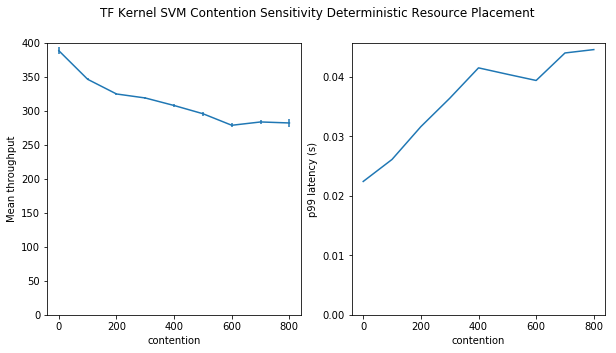

In [42]:
plot_contention("../results_cpp_benchmarker/e2e_results/image_driver_1/single_model_profiles_contention_sensitivity/tf-kernel-svm-SMP-remote-contention-sensitivity-analysis-no-resource-bundle-randomization/", "Deterministic Resource Placement")

Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. 

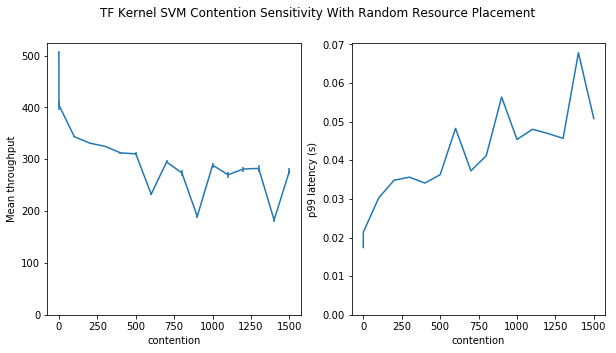

In [36]:
plot_contention("../results_cpp_benchmarker/e2e_results/image_driver_1/single_model_profiles_contention_sensitivity/tf-kernel-svm-SMP-remote-contention-sensitivity-analysis/", "With Random Resource Placement")

In [34]:
# contention_path = "../results_cpp_benchmarker/e2e_results/image_driver_1/single_model_profiles_contention_sensitivity/tf-kernel-svm-SMP-remote-contention-sensitivity-analysis/"
contention_path = "../results_cpp_benchmarker/e2e_results/image_driver_1/single_model_profiles_contention_sensitivity/tf-kernel-svm-SMP-remote-contention-sensitivity-analysis-no-resource-bundle-randomization/"

non_contention_path = "../results_cpp_benchmarker/single_model_profs/tf-kernel-svm/"

contention_df = snp.create_node_profile_df(contention_path)
no_contention_df = snp.create_node_profile_df(non_contention_path)

Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. Assuming you used V100s
Client was running on separate machine. 

In [35]:
nc_df = no_contention_df[1]
c_df = contention_df[1]
match_nc_df = nc_df[(nc_df.cloud == "aws") & (nc_df.mean_batch_size == 8)]
c_df = c_df.append(match_nc_df)
c_df = c_df.sort_values("contention")

In [23]:
c_df

,num_cpus_per_replica,thru_stage_mean_throughput_qps,thru_stage_std_throughput_qps,latency_stage_mean_throughput_qps,latency_stage_std_throughput_qps,p99_latency,mean_batch_size,mean_queue_size,cost,fname,cloud,gpu_type,contention
2,1,506.9,0.944592,484.1,2.187331,0.017416,8.0,0.0,0.0665,under_over-cpp-aws-results-k80-tf-kernel-svm-b...,aws,none,-1
5,1,343.5,0.915783,369.2,7.228466,0.030270,8.0,0.0,0.0665,v100-contention-100-model-tf-kernel-svm-batch-...,aws,none,100
14,1,331.2,1.026200,345.6,4.340769,0.034834,8.0,0.0,0.0665,v100-contention-200-model-tf-kernel-svm-batch-...,aws,none,200
9,1,324.9,1.677344,333.8,3.272829,0.035625,8.0,0.0,0.0665,v100-contention-300-model-tf-kernel-svm-batch-...,aws,none,300
0,1,312.4,1.280624,326.0,4.750725,0.034099,8.0,0.0,0.0665,v100-contention-400-model-tf-kernel-svm-batch-...,aws,none,400
7,1,310.4,2.689075,323.3,2.402003,0.036264,8.0,0.0,0.0665,v100-contention-500-model-tf-kernel-svm-batch-...,aws,none,500
3,1,232.6,2.291665,242.6,2.765771,0.048246,8.0,0.0,0.0665,v100-contention-600-model-tf-kernel-svm-batch-...,aws,none,600
11,1,294.8,2.917808,317.8,4.788497,0.037267,8.0,0.0,0.0665,v100-contention-700-model-tf-kernel-svm-batch-...,aws,none,700
12,1,273.7,5.319276,295.8,3.703598,0.041174,8.0,0.0,0.0665,v100-contention-800-model-tf-kernel-svm-batch-...,aws,none,800
6,1,189.9,3.678925,211.0,2.737900,0.056369,8.0,0.0,0.0665,v100-contention-900-model-tf-kernel-svm-batch-...,aws,none,900


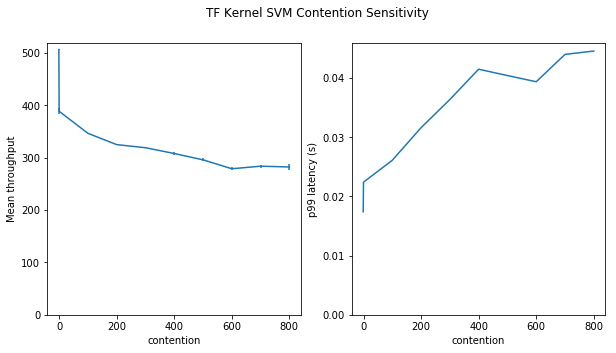

In [29]:
fig, (ax_thru, ax_lat) = plt.subplots(ncols=2, figsize=(10,5))
ax_thru.errorbar(c_df.contention, c_df.thru_stage_mean_throughput_qps, yerr=c_df.thru_stage_std_throughput_qps, label="tf-kernel-svm")
ax_lat.plot(c_df.contention, c_df.p99_latency, label="tf-kernel-svm")
ax_thru.set_ylim(bottom=0)
ax_lat.set_ylim(bottom=0)
ax_thru.set_xlabel("contention")
ax_thru.set_ylabel("Mean throughput")
ax_lat.set_xlabel("contention")
ax_lat.set_ylabel("p99 latency (s)")
fig.suptitle("TF Kernel SVM Contention Sensitivity")
plt.show()